In [119]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
import statsmodels.tsa.arima_process as sta
import statsmodels.graphics.tsaplots as sgt
from scipy import stats

%matplotlib inline

In [221]:
df = pd.read_csv('P2training.csv',header=0)
df.tail()

,Date,AUD/USD,GBP/USD,CAD/USD,NLG/USD,FRF/USD,DEM/USD,JPY/USD,CHF/USD
4014,1995-12-22,1.352265,0.648298,1.3637,1.6105,4.9340,1.4386,102.60,1.1592
4015,1995-12-26,1.351351,0.642880,1.3613,1.6045,4.9110,1.4335,102.38,1.1560
4016,1995-12-27,1.337256,0.641026,1.3601,1.6020,4.8855,1.4310,102.80,1.1530
4017,1995-12-28,1.342282,0.649773,1.3605,1.6111,4.9200,1.4420,102.87,1.1565
4018,1995-12-29,1.345533,0.643708,1.3655,1.6035,4.8975,1.4345,103.28,1.1540


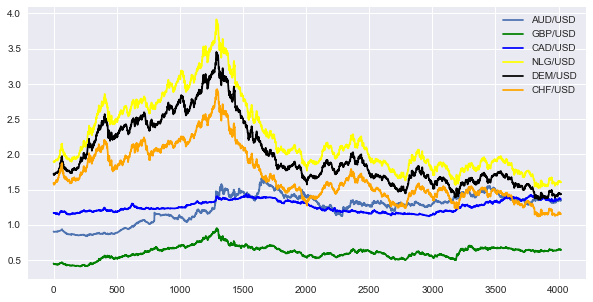

In [10]:
fig = plt.figure(figsize=(10,5))
plt.plot(df['AUD/USD'])
#plt.plot(df['JPY/USD'], color='red')
plt.plot(df['GBP/USD'], color='green')
plt.plot(df['CAD/USD'], color='blue')
plt.plot(df['NLG/USD'], color='yellow')
#plt.plot(df['FRF/USD'], color='brown')
plt.plot(df['DEM/USD'], color='black')
plt.plot(df['CHF/USD'], color='orange')
plt.legend(loc='best')

In [222]:
collist=[]
no = range(0,len(df))
DateNo = pd.DataFrame(no,columns=['DateNo'])
df2 = pd.concat([DateNo,df],axis=1)
df.rename(columns=lambda x:x.replace('/',''), inplace=True)
df2.rename(columns=lambda x:x.replace('/',''), inplace=True)
#df2.columns = df2.columns.str.strip('/')
collist = list(df2.columns)
collist.remove('Date')
collist.remove('JPYUSD')
print collist
JPY = df['JPYUSD']

['DateNo', 'AUDUSD', 'GBPUSD', 'CADUSD', 'NLGUSD', 'FRFUSD', 'DEMUSD', 'CHFUSD']


In [ ]:
form = 'JPYUSD' + '~' + '+'.join(collist)
df2.dropna(inplace=True)
model = smf.ols(formula=form, data = df2).fit()

In [35]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                 JPYUSD   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:05:51   Log-Likelihood:                -15548.
No. Observations:                4019   AIC:                         3.111e+04
Df Residuals:                    4010   BIC:                         3.117e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.2840      3.832     40.527      0.0

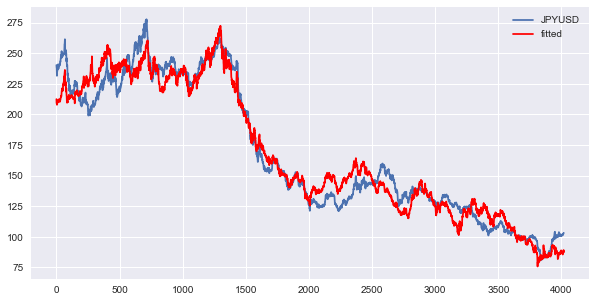

In [36]:
fig = plt.figure(figsize=(10,5))
plt.plot(df2['JPYUSD'])
plt.plot(model.fittedvalues, color='red', label='fitted')
plt.legend(loc='best')

In [104]:
import statsmodels.api as sm
#ldfJPY = np.log(df.JPYUSD)

exData = df2[collist2]

dfJPY = df[['Date','JPY/USD']]
dfJPY.Date = pd.to_datetime(dfJPY.Date)
dfJPY.set_index('Date',inplace=True, drop=True)

model2 = sm.tsa.SARIMAX(dfJPY,exData.values,trend='n', order=(1,1,1), seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
result_sm2 = model2.fit()
print(result_sm2.summary())

/Users/williammeng/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/williammeng/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            JPY/USD   No. Observations:                 4019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5029.442
Date:                            Thu, 16 Nov 2017   AIC                          10082.883
Time:                                    19:21:41   BIC                          10158.468
Sample:                                12-31-1979   HQIC                         10109.670
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.3483      1.679      4.377      0.000       4.058      10.639
x2            -7.1382      4.578   

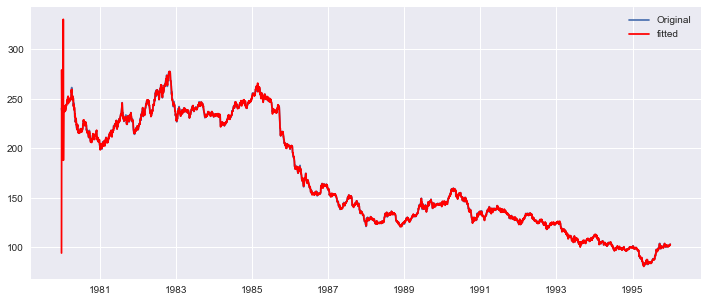

In [105]:
fitval = result_sm2.fittedvalues

fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(fitval, color='red', label='fitted')
plt.legend(loc='best')

In [124]:
#check correlated
for rate in collist:
    coeff,pvalue = stats.pearsonr(dfJPY['JPY/USD'], df2[rate])
    print coeff, pvalue, rate


-0.905783572791 0.0 DateNo
-0.608223339797 0.0 AUDUSD
0.0915618880666 6.06224428813e-09 GBPUSD
-0.131280029618 6.47861679519e-17 CADUSD
0.837839581262 0.0 NLGUSD
0.544880799116 1.26865521549e-309 FRFUSD
0.856353095555 0.0 DEMUSD
0.882881373692 0.0 CHFUSD


In [227]:
# lag CHFUSD
CHF = df2['CHFUSD']
lags = [1,2,3,5,10,20,30,50]
lagdata = pd.DataFrame(CHF)
for i in lags:
    tmp = CHF.shift(i).copy();
    lagdata = lagdata.join(tmp, rsuffix='_lag{}'.format(i));
lagdata = lagdata.join(JPY);
print lagdata.columns
collistlag = list(lagdata.columns);
collistlag.remove('JPYUSD')

print 'coeff  ','P-value  ','Currency'
#check lag correlated
lagdata.dropna(inplace=True)
for rate2 in collistlag:
    coeff,pvalue = stats.pearsonr(JPY[50:,], lagdata[rate2])
    print coeff, pvalue, rate2


Index([u'CHFUSD', u'CHFUSD_lag1', u'CHFUSD_lag2', u'CHFUSD_lag3',
       u'CHFUSD_lag5', u'CHFUSD_lag10', u'CHFUSD_lag20', u'CHFUSD_lag30',
       u'CHFUSD_lag50', u'JPYUSD'],
      dtype='object')
coeff   P-value   Currency
0.896132426814 0.0 CHFUSD
0.89571367914 0.0 CHFUSD_lag1
0.895281057125 0.0 CHFUSD_lag2
0.894841793209 0.0 CHFUSD_lag3
0.893856348788 0.0 CHFUSD_lag5
0.891148858266 0.0 CHFUSD_lag10
0.884973800351 0.0 CHFUSD_lag20
0.878107535972 0.0 CHFUSD_lag30
0.863252232869 0.0 CHFUSD_lag50


In [226]:
# lag JPYUSD
TJPY = df2['JPYUSD']
lags = [1,2,3,5,10,20,30,50]
lagdata = pd.DataFrame(TJPY)
for i in lags:
    tmp = TJPY.shift(i).copy();
    lagdata = lagdata.join(tmp, rsuffix='_lag{}'.format(i));
#lagdata = lagdata.join(JPY);
print lagdata.columns
collistlag = list(lagdata.columns);
collistlag.remove('JPYUSD')

print 'coeff  ','P-value  ','Currency'
#check lag correlated
lagdata.dropna(inplace=True)
for rate2 in collistlag:
    coeff,pvalue = stats.pearsonr(JPY[50:,], lagdata[rate2])
    print coeff, pvalue, rate2

Index([u'JPYUSD', u'JPYUSD_lag1', u'JPYUSD_lag2', u'JPYUSD_lag3',
       u'JPYUSD_lag5', u'JPYUSD_lag10', u'JPYUSD_lag20', u'JPYUSD_lag30',
       u'JPYUSD_lag50'],
      dtype='object')
coeff   P-value   Currency
0.999778667162 0.0 JPYUSD_lag1
0.999542117607 0.0 JPYUSD_lag2
0.999298768191 0.0 JPYUSD_lag3
0.99876051963 0.0 JPYUSD_lag5
0.997265579773 0.0 JPYUSD_lag10
0.993819568268 0.0 JPYUSD_lag20
0.99011833663 0.0 JPYUSD_lag30
0.982843251536 0.0 JPYUSD_lag50


In [158]:
# lag DEMUSD
DEM = df2['DEMUSD']
lags = [1,2,3,5]
lagdata = pd.DataFrame(DEM)
for i in lags:
    tmp = DEM.shift(i).copy();
    lagdata = lagdata.join(tmp, rsuffix='_lag{}'.format(i));
lagdata = lagdata.join(JPY);
print lagdata.columns

collistlag = list(lagdata.columns);
collistlag.remove('JPYUSD')
#check lag correlated
lagdata.dropna(inplace=True)
for rate2 in collistlag:
    coeff,pvalue = stats.pearsonr(JPY[5:,], lagdata[rate2])
    print coeff, pvalue, rate2

Index([u'DEMUSD', u'DEMUSD_lag1', u'DEMUSD_lag2', u'DEMUSD_lag3',
       u'DEMUSD_lag5', u'JPYUSD'],
      dtype='object')
0.858289383769 0.0 DEMUSD
0.857599688996 0.0 DEMUSD_lag1
0.856908553261 0.0 DEMUSD_lag2
0.856210608724 0.0 DEMUSD_lag3
0.854765558878 0.0 DEMUSD_lag5


In [160]:
# lag NLGUSD
NLG = df2['NLGUSD']
lags = [1,2,3,5]
lagdata = pd.DataFrame(NLG)
for i in lags:
    tmp = NLG.shift(i).copy();
    lagdata = lagdata.join(tmp, rsuffix='_lag{}'.format(i));
lagdata = lagdata.join(JPY);
print lagdata.columns

collistlag = list(lagdata.columns);
collistlag.remove('JPYUSD')
#check lag correlated
lagdata.dropna(inplace=True)
for rate2 in collistlag:
    coeff,pvalue = stats.pearsonr(JPY[5:,], lagdata[rate2])
    print coeff, pvalue, rate2

Index([u'NLGUSD', u'NLGUSD_lag1', u'NLGUSD_lag2', u'NLGUSD_lag3',
       u'NLGUSD_lag5', u'JPYUSD'],
      dtype='object')
0.839865951059 0.0 NLGUSD
0.839152235062 0.0 NLGUSD_lag1
0.838430846161 0.0 NLGUSD_lag2
0.837705657746 0.0 NLGUSD_lag3
0.836195568418 0.0 NLGUSD_lag5


In [142]:
#fit the linear regression models

collistlag = list(lagdata.columns);
collistlag.remove('JPYUSD')
form = 'JPYUSD' + '~' + '+'.join(collistlag);
lagdata.dropna(inplace=True)
model = smf.ols(formula=form, data = lagdata).fit()

In [143]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 JPYUSD   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2875.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:29:22   Log-Likelihood:                -18720.
No. Observations:                4014   AIC:                         3.745e+04
Df Residuals:                    4008   BIC:                         3.749e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -48.7022      1.862    -26.161      0.000     -52.352     -45.052
CHFUSD        128.1338     29.471      4.348      0.000      70.355     185.913
CHFUSD_lag1    -3.7861     42.489     -0.089      0.929     -87.087      79.515
CHFUSD_lag2    -1.1336     42.489     -0.027      0.979     -84.435      82.168
CHFUSD_lag3     0.0311     36.520      0.001      0.999     -71.567      71.630
CHFUSD_lag5     4.5659     20.451      0.223      0.823     -35.529      44.661
==============================================================================
Omnibus:                      455.894   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.214
Skew:                           0.901   Prob(JB):                    2.33e-137
Kurtosis:                       3.717   Cond. No.                         557.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

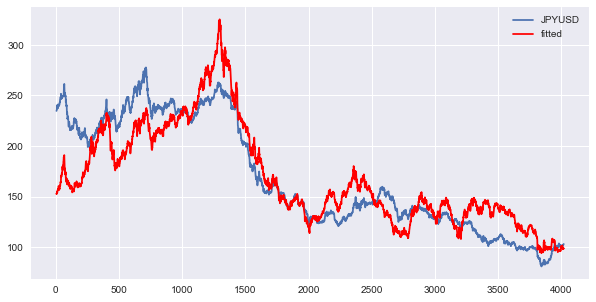

In [144]:
fig = plt.figure(figsize=(10,5))
plt.plot(lagdata['JPYUSD'])
plt.plot(model.fittedvalues, color='red', label='fitted')
plt.legend(loc='best')

In [229]:
CHF = df2['CHFUSD']
DEM = df2['DEMUSD']
NLG = df2['NLGUSD']
CHF =pd.DataFrame(CHF)
dataJoin = df2['JPYUSD']
dataJoin =pd.DataFrame(dataJoin)
dataJoin= dataJoin.join(CHF);
#dataJoin = list(dataJoin)
data = dfJPY.values -CHF.values


[[ 238.705 ]
 [ 236.8725]
 [ 236.778 ]
 ..., 
 [ 101.647 ]
 [ 101.7135]
 [ 102.126 ]]


In [193]:
CHF = df2['CHFUSD']
DEM = df2['DEMUSD']
NLG = df2['NLGUSD']
lags = [1,2,3]
lagdata = pd.DataFrame(CHF)
for i in lags:
    tmp = CHF.shift(i).copy();
    lagdata = lagdata.join(tmp, rsuffix='_lag{}'.format(i));
print lagdata.columns
lagdata = lagdata.join(DEM);
lagdata = lagdata.join(NLG);

dfJPY = df[['Date','JPYUSD']]
dfJPY.Date = pd.to_datetime(dfJPY.Date)
dfJPY.set_index('Date',inplace=True, drop=True)
n =len(dfJPY)
model2 = sm.tsa.SARIMAX(dfJPY[3:n],lagdata[3:n].values,trend='n', order=(0,1,9), seasonal_order=(0,1,1,65),enforce_stationarity=False,enforce_invertibility=False)
result_sm2 = model2.fit()
print(result_sm2.summary())

Index([u'CHFUSD', u'CHFUSD_lag1', u'CHFUSD_lag2', u'CHFUSD_lag3'], dtype='object')


/Users/williammeng/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                             JPYUSD   No. Observations:                 4016
Model:             SARIMAX(0, 1, 9)x(0, 1, 1, 65)   Log Likelihood               -4874.205
Date:                            Sun, 19 Nov 2017   AIC                           9782.410
Time:                                    18:14:15   BIC                           9889.477
Sample:                                01-04-1980   HQIC                          9820.355
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.5613      2.069     15.257      0.000      27.507      35.616
x2            -0.4612      0.900   

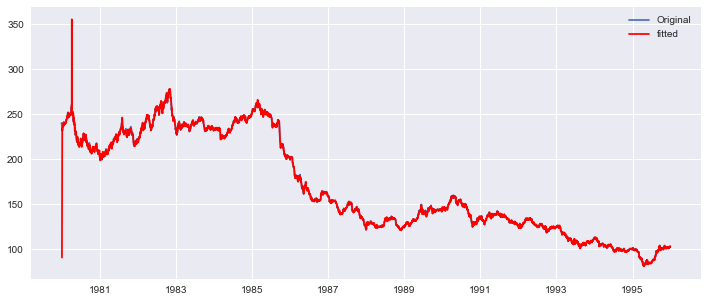

In [194]:
# make prediction
fitval = result_sm2.fittedvalues
fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(fitval, color='red', label='fitted')
plt.legend(loc='best')

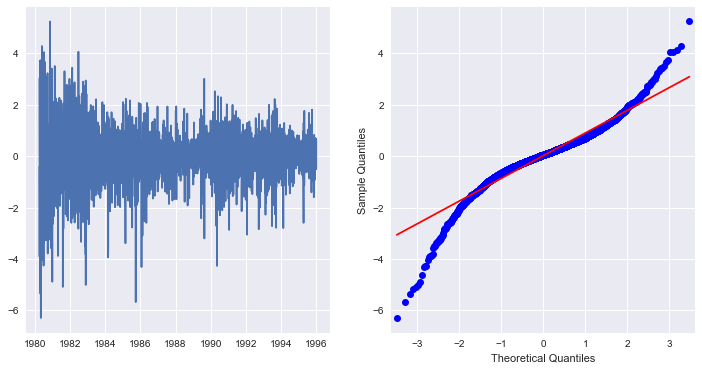

In [196]:
residual = result_sm2.resid
residual = residual[66:,]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(residual)
fig = sm.qqplot(residual, stats.distributions.norm, line='r', ax=ax[1]) 

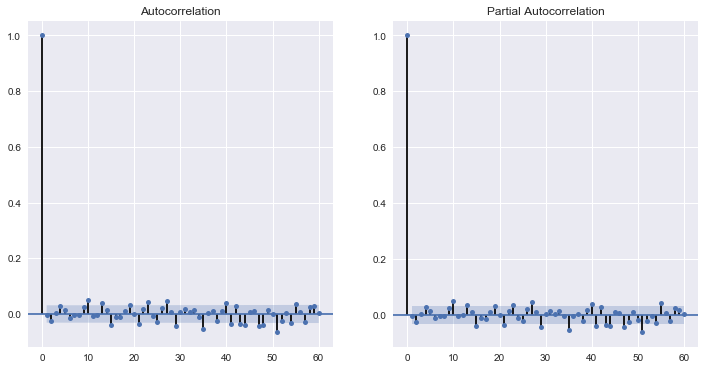

In [199]:
alpha = 0.05
lags = 60
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(residual, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(residual, ax=ax[1], lags=lags, alpha=alpha, method='ols')